In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [2]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

C:\Users\hoang\miniconda3\lib\site-packages\torch\hub.py:293: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\hoang/.cache\torch\hub\master.zip
YOLOv5  2023-5-28 Python-3.9.12 torch-2.1.0.dev20230515 CUDA:0 (NVIDIA GeForce GTX 1650, 4096MiB)

100%|██████████████████████████████████████████████████████████████████████████████| 14.1M/14.1M [01:54<00:00, 129kB/s]

Fusing layers...

In [3]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

# 3. Make detections

In [4]:
img = "https://imgv3.fotor.com/images/blog-cover-image/How-to-Make-Text-Stand-Out-And-More-Readable.jpg"

In [5]:
results = model(img)

In [6]:
results.print()

image 1/1: 548x732 (no detections)
Speed: 8605.5ms pre-process, 22017.2ms inference, 1227.5ms NMS per image at shape (1, 3, 480, 640)


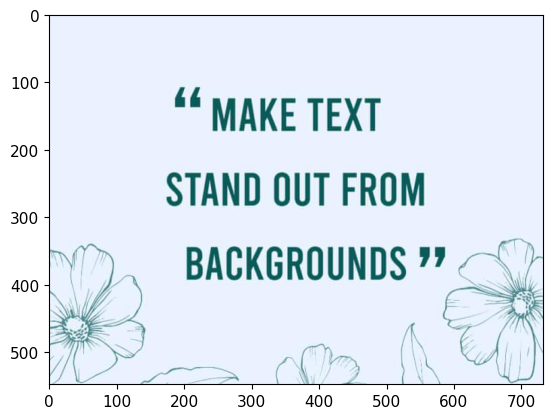

In [7]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

In [8]:
results.xyxy

[tensor([], device='cuda:0', size=(0, 6))]

In [11]:
np.array(results.render()).shape

(1, 548, 732, 3)

# 4. Real time detections

In [12]:
# TODO: Change the file_name below
cap = cv2.VideoCapture('file_name.mp4')
while cap.isOpened():
    ret, frame= cap.read()
    
    # Make detections
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

# 5. Train from scratch

In [13]:
import uuid # Unique identifer
import os
import time

In [14]:
IMAGES_PATH = "../data/vietnamese/train_images"
labels =['text']
number_imgs = 1200

In [ ]:
cap = cv

In [ ]:
cap = cv2.VideoCapture('file_name.mp4')
while cap.isOpened():
    ret, frame= cap.read()
    
    # Make detections
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()